# Hand Gesture Classification

In [1]:
# Install Tensorflow
#!pip install tensorflow

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorFlow version: 2.15.0


In [2]:
# Zero dimensional tensor
zero_dim_tensor = tf.constant(20)
print(zero_dim_tensor)

# One dimensional tensor
one_dim_tensor = tf.constant([12, 20, 53, 26, 11, 56])
print(one_dim_tensor)

# Two dimensional tensor
two_dim_array = [[3, 6, 7, 5], 
                 [9, 2, 3, 4],
                 [7, 1, 10,6],
                 [0, 8, 11,2]]

two_dim_tensor = tf.constant(two_dim_array)
print(two_dim_tensor)

tf.Tensor(20, shape=(), dtype=int32)
tf.Tensor([12 20 53 26 11 56], shape=(6,), dtype=int32)
tf.Tensor(
[[ 3  6  7  5]
 [ 9  2  3  4]
 [ 7  1 10  6]
 [ 0  8 11  2]], shape=(4, 4), dtype=int32)


# Load Data

In [3]:
from tensorflow.keras.datasets import cifar10 as cf10
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

In [5]:
train_images, train_labels, test_images, test_labels, classes = load_signs_dataset()

## EDA

In [14]:
# Normalize the x, then convert the output from numerical to categorical
from tensorflow.keras.utils import to_categorical

# Data normalization
x_train = train_images / 255
x_test = test_images / 255

# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
y_train = train_labels.T
y_test = test_labels.T
y_train = to_categorical(y_train, len(class_names))
y_test = to_categorical(y_test, len(class_names))

print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))
print ("The proportion of the train data is " + str(round((len(x_train)/(len(x_train)+len(x_test)))*100,2)) + "%")

number of training examples = 1080
number of test examples = 120
x_train shape: (1080, 64, 64, 3)
y_train shape: (1080, 6)
x_test shape: (120, 64, 64, 3)
y_test shape: (120, 6)
The proportion of the train data is 90.0%


In [8]:
# 1. Function for showing images
def show_images(train_images, 
                class_names, 
                train_labels, 
                nb_samples = 12, nb_row = 4):
    
    plt.figure(figsize=(12, 12))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[y_train[i][0]])
    plt.show()

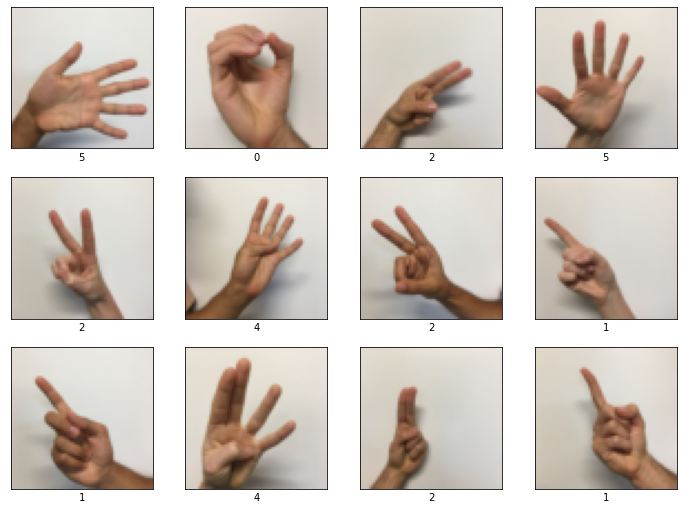

In [9]:
# Visualize some sample images from the dataset
class_names = ['0', '1', '2', '3', '4', '5']

show_images(train_images, class_names, y_train)

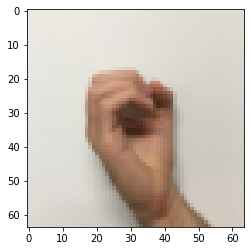

In [10]:
# Visualize a sample images from the dataset
index = 91
plt.imshow(train_images[index]) #display sample training image
plt.show()

# 5 Model

## 5.1 Architecture

In [11]:
# GRADED FUNCTION: convolutional_model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 8, kernel_size = 4, strides  = 1, padding = 'same', input_shape = (64, 64, 3)),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size = 8, strides  = 8, padding = 'same'),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = 2, strides  = 1, padding = 'same'),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size = 4, strides  = 4, padding = 'same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 6, activation = 'softmax')
    ])

C:\Users\ASUS\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 8)           │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64, 64, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 2, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,310 (5.12 KB)

 Trainable params: 1,310 (5.12 KB)

 Non-trainable params: 0 (0.00 B)

![Arch3.png](Arch3.png)

In [15]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 64
EPOCHS = 100

METRICS = metrics=['accuracy', 
                   Precision(name='precision'),
                   Recall(name='recall')]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = METRICS)

# Train the model
training_history = model.fit(x_train, y_train, 
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(x_test, y_test))

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.1753 - loss: 0.6635 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2000 - val_loss: 0.5208 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2142 - loss: 0.4922 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2417 - val_loss: 0.4591 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2381 - loss: 0.4545 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1167 - val_loss: 0.4517 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1511 - loss: 0.4509 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1333 - val_loss: 0.4509 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1887 - loss: 0.4502 - precisio

In [16]:
def show_performance_curve(training_result, metric, metric_label):
    import numpy as np
    import matplotlib.pyplot as plt
    
    train_perf = training_result.history[str(metric)]
    validation_perf = training_result.history['val_'+str(metric)]
    intersection_indices = np.argwhere(np.isclose(train_perf, validation_perf, atol=1e-2)).flatten()
    
    # Check if intersection_indices is not empty
    if intersection_indices.size > 0:
        intersection_idx = intersection_indices[0]
        intersection_value = train_perf[intersection_idx]
    else:
        # Handle the case where no intersection is found
        intersection_idx = None
        intersection_value = None
        print("No intersection found within the given tolerance.")
    
    plt.plot(train_perf, label=metric_label + ' (Training)')
    plt.plot(validation_perf, label=metric_label + ' (Validation)')
    if intersection_idx is not None:
        plt.plot(intersection_idx, intersection_value, 'ro')  # Mark the intersection point
        plt.text(intersection_idx, intersection_value, f'Intersection at index {intersection_idx}', fontsize=9)
    plt.title('Training and Validation ' + metric_label)
    plt.xlabel('Epochs')
    plt.ylabel(metric_label)
    plt.legend()
    plt.show()

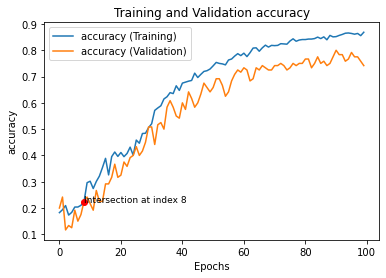

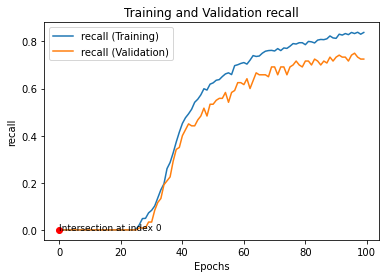

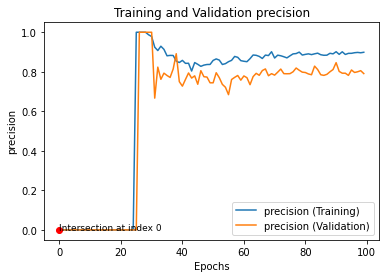

In [17]:
show_performance_curve(training_history, 'accuracy', 'accuracy')
show_performance_curve(training_history, 'recall', 'recall')
show_performance_curve(training_history, 'precision', 'precision')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


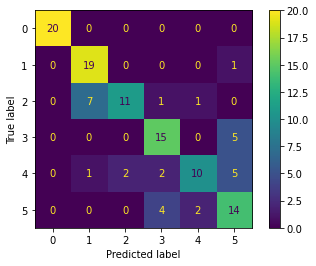

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtain the model's predictions on the test dataset
test_predictions = model.predict(x_test)

# Convert predictions from probabilities to class labels
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Convert one-hot encoded true labels back to class labels
test_true_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Create a ConfusionMatrixDisplay instance
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()